## Radioactive decay main program

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from plot_utils.plot import setup_mpl

setup_mpl(as_default=0)

In [79]:
## euler method
def calculate(n_uranium,tau,dt,n,t):
    for i in range(n-1):
        n_uranium[i+1] = n_uranium[i] - (n_uranium[i]/tau)*dt
        t[i+1] = t[i] + dt
    return n_uranium,t

def main(n = 100, dt = 0.05, tau = 1):
    n_uranium = np.zeros(n)
    t = np.zeros(n)
    n_uranium[0] = n # initial number of uranium
    n_uranium,t = calculate(n_uranium,tau,dt,n,t)
    return n_uranium,t

ls_dt = [ main(n = 100, dt = 0.05, tau = 1),
      main(n = 100, dt = 0.1, tau = 1),
      main(n = 100, dt = 0.5, tau = 1)]
label_dt = ['dt=0.05','dt=0.1','dt=0.5']

ls_tau = [
    main(n = 100, dt = 0.1, tau = 0.5),
      main(n = 100, dt = 0.1, tau = 1),
      main(n = 100, dt = 0.1, tau = 2)]
label_tau = ['tau=0.5','tau=1','tau=2']

In [80]:
# ODE solution function
def decay(n_uranium, tau, t):
    return n_uranium * np.exp(-t / tau)

def func(n = 100, dt = 0.05, tau = 1):
    t = np.zeros(n)
    n_uranium = np.zeros(n)
    n_uranium[0] = n
    for i in range(n-1):
        t[i+1] = t[i] + dt
        n_uranium[i+1] = decay(n_uranium[0], tau, t[i+1])
    return n_uranium,t

ls_funcdt = [ func(n = 100, dt = 0.05, tau = 1),
             func(n = 100, dt = 0.1, tau = 1),
             func(n = 100, dt = 0.5, tau = 1)]

ls_functau = [func(n = 100, dt = 0.1, tau = 0.5),
              func(n = 100, dt = 0.1, tau = 1),
              func(n = 100, dt = 0.1, tau = 2)]


(-1.0, 10.0)

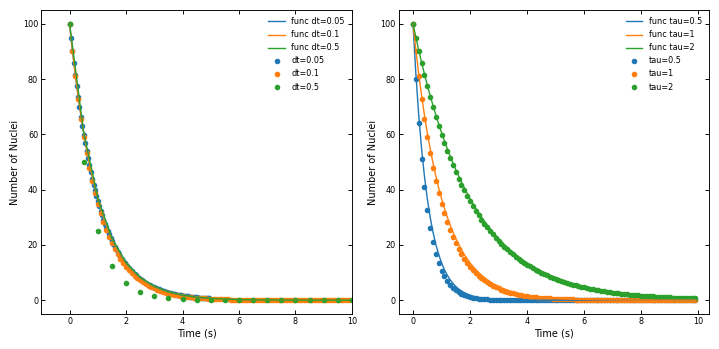

In [83]:
fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)
cmap = plt.get_cmap("tab10")

for i in range(3):
    ax[0].scatter(ls_dt[i][1],ls_dt[i][0],marker='.',color=cmap(i),label=label_dt[i])
    ax[0].plot(ls_funcdt[i][1],ls_funcdt[i][0],marker='',color=cmap(i),label='func '+label_dt[i])
    ax[1].scatter(ls_tau[i][1],ls_tau[i][0],marker='.',color=cmap(i),label=label_tau[i])
    ax[1].plot(ls_functau[i][1],ls_functau[i][0],marker='',color=cmap(i),label='func '+label_tau[i])

for i in range(2):
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Number of Nuclei')
    ax[i].legend(frameon=False)
ax[0].set_xlim(-1,10)

## Exercises

###  1.1 Freely falling

- $\frac{dv}{dt} = -g$
- $v = v_0 - gt$


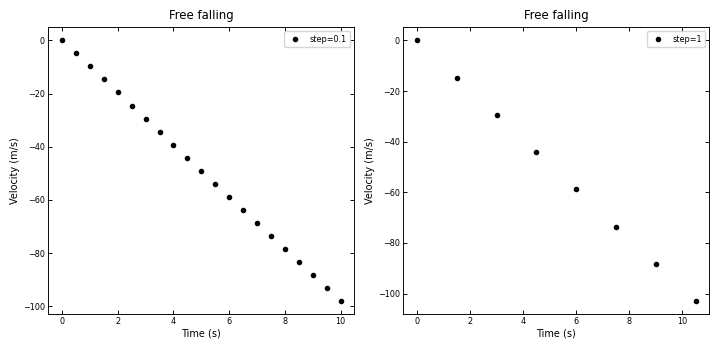

In [116]:
step = 0.01

def free_falling(step=0.01):
    t = np.arange(0, 10+step, step)
    n_step = len(t)
    v = np.zeros(n_step)
    g = 9.8
    for i in range(n_step):
        v[i] = -g*t[i]
    return t, v

fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)

t,v = free_falling(step=0.5)
ax[0].scatter(t,v,marker='.',color='k',label="step=0.1")
t,v = free_falling(step=1.5)
ax[1].scatter(t,v,marker='.',color='k',label="step=1")

for i in range(2):
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Velocity (m/s)")
    ax[i].set_title("Free falling")
    ax[i].legend()

### 1.2  object moving horizontally

$x = v t$

### 1.3 parachutist

$\frac{dv}{dt} = a - bv$

$v = v_{0} + (a-bv_{0})\Delta t$

- step要极小才有意义，不然会出现很大的误差

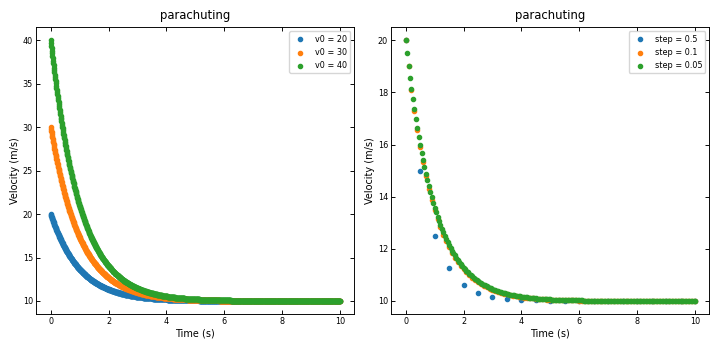

In [55]:
step = 0.01

def parachuting(step=0.01, a = 10, b =1,v0=20):
    t = np.arange(0, 10+step, step)
    n_step = len(t)
    v = np.zeros(n_step)
    v[0]=v0
    for i in range(n_step-1):
        v[i+1] = v[i] + a*step - b*v[i]*step
    return t, v

fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)
cmap = plt.get_cmap("tab10")

ls_v0 = [20,30,40]
for i in range(len(ls_v0)):
    t,v = parachuting(v0=ls_v0[i])
    ax[0].scatter(t,v,marker='.',color=cmap(i),label="v0 = "+str(ls_v0[i]))

ls_step = [0.5,0.1,0.05]
for i in range(len(ls_step)):
    t,v = parachuting(step=ls_step[i])
    ax[1].scatter(t,v,marker='.',color=cmap(i),label="step = "+str(ls_step[i]))

for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Velocity (m/s)")
    ax[i].set_title("parachuting")


### 1.4 two types of nuclei radioactive decay 


In [70]:
import numpy as np



def radioactive_A(tau_a = 1, tau_b=1,Na0 = 100,step = 0.01):
    t = np.arange(0,10+step,step)
    n = len(t)
    N_a = np.zeros(n)
    N_b = np.zeros(n)
    N_a[0] = Na0
    N_b[0] = 0
    for i in range(n-1):
        N_a[i+1] = N_a[i] - N_a[i]*step/tau_a
        N_b[i+1] = N_b[i] + (N_a[i]/tau_a - N_b[i]/tau_b)*step
    return t,N_a,N_b

In [72]:
t,N_a,N_b = radioactive_A(tau_a = 1, tau_b = 1,Na0 = 100,step = 0.01)

In [141]:
len(ls_taua)

5

Text(0.5, 0.98, 'Radioactive Decay')

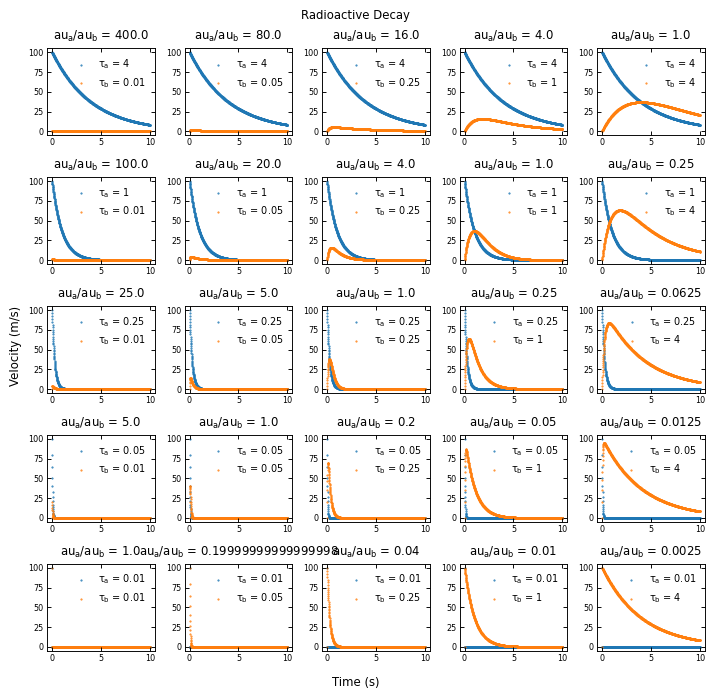

In [146]:
fig,ax = plt.subplots(5,5,figsize=(3.60236*2,3.5*2),dpi=100)
ax = ax.flatten()
ls_taua = [4,1,0.25,0.05,0.01]
ls_taub = ls_taua[::-1]

for i in range(len(ls_taua)**2):
    a = ls_taua[i//5]
    b = ls_taub[i%5]
    t,N_a,N_b = radioactive_A(tau_a = a, tau_b = b,Na0 = 100,step = 0.01)
    ax[i].scatter(t,N_a,s=1,marker='.',label = r'$\tau_a$ = {}'.format(a))
    ax[i].scatter(t,N_b,s=1,marker='.',label = r'$\tau_b$ = {}'.format(b))
    ax[i].legend(frameon=False,fontsize=7)
    ratio = np.array(a/b)
    ax[i].set_title(f'$\tau_a/\tau_b$ = {ratio}')

fig.supxlabel("Time (s)")
fig.supylabel("Velocity (m/s)")
fig.suptitle("Radioactive Decay")

In [157]:
# analytic solution

def analytic(N_a0 = 100,tau_a = 1,tau_b = 0.1,step=0.01):
    t = np.arange(0, 10+step, step)
    N_a = np.vectorize(lambda t: N_a0*np.exp(-t/tau_a))(t)
    k = -N_a0*tau_b/(tau_a-tau_b)
    print(k)
    N_b = np.vectorize(lambda t: (N_a0*tau_b/(tau_a-tau_b))*np.exp(-t/tau_a)+k*np.exp(-t/tau_b))(t)
    return t,N_a,N_b

-0.2531391764204617
-1.2683865414314288
-6.669511186964985
-33.337777925930865
4000100.0000093225
-1.0203050813213457
-5.274239393620382
-33.35111348179757
1000100.0000001102
133.33222225925803
-4.210087536473531
-25.06253126563282
250100.00000002753
133.32888948140248
106.6664888936295
-25.313283208020046
50099.999999998574
124.98750624687655
105.26260393642775
101.26579073947495
10100.000000000062
124.93765586034914
104.1649312786339
101.00999899000102
100.25062028520588


Text(0.5, 0.98, 'Radioactive Decay')

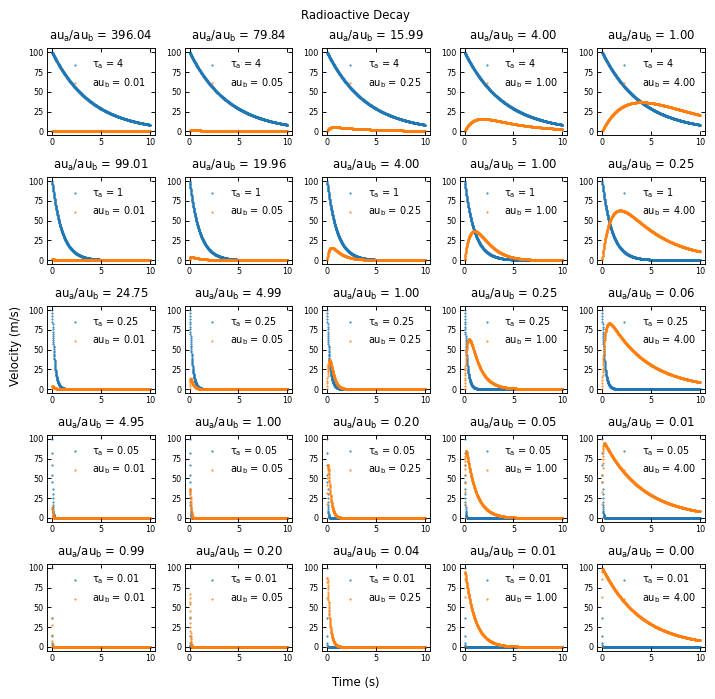

In [162]:
fig,ax = plt.subplots(5,5,figsize=(3.60236*2,3.5*2),dpi=100)
ax = ax.flatten()
ls_taua = [4,1,0.25,0.05,0.01]
ls_taub = ls_taua[::-1]

for i in range(len(ls_taua)**2):
    a = ls_taua[i//5]
    b = ls_taub[i%5]+0.0001
    t,N_a,N_b = analytic(tau_a = a, tau_b = b,N_a0 = 100,step = 0.01)
    ax[i].scatter(t,N_a,s=1,marker='.',label = r'$\tau_a$ = {}'.format(a))
    ax[i].scatter(t,N_b,s=1,marker='.',label = f'$\tau_b$ = {b:.2f}')
    ax[i].legend(frameon=False,fontsize=7)
    ratio = np.array(a/b)
    ax[i].set_title(f'$\tau_a/\tau_b$ = {ratio:.2f}')

fig.supxlabel("Time (s)")
fig.supylabel("Velocity (m/s)")
fig.suptitle("Radioactive Decay")